In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

#load the data set and convert to a pandas df
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# add the target to df
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# slpit data into x and y
X = df.drop('target', axis='columns')
y = df['target']
X.shape, y.shape

((442, 10), (442,))

In [ ]:
# split data into training (80%) and testing (20%) pools

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (353, 10) (353,)
Testing set:  (89, 10) (89,)


In [ ]:
# create the linear regression model

from sklearn.linear_model import LinearRegression
l = LinearRegression();

# train model on training set
l.fit(X_train, y_train)

LinearRegression()

In [ ]:
# use the testing set for predictions
# y_pred are the "predicted values" of the target for the features
# which can then be compared to the actual target values to evaluate the model performance
y_pred = l.predict(X_test)
y_pred.shape

(89,)

In [ ]:
# evaluate model performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = l.intercept_

print("R2 score: ", r2) # 0-1: how well the model fits the data
print("Mean Squared Error: ", mse) # average squared dist between pred and actuals
print("Mean Absolute Error: ", mae) # average absolute dist between pred and actuals
print("Intercept: ", intercept) # of regression line on y axis

R2 score:  0.4526027629719197
Mean Squared Error:  2900.19362849348
Mean Absolute Error:  42.79409467959994
Intercept:  151.34560453985995


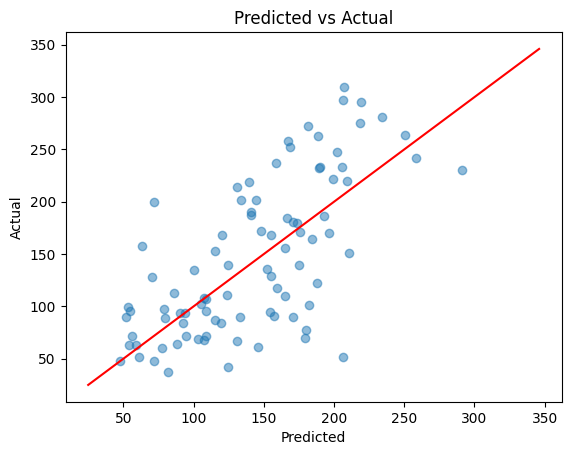

In [14]:
import matplotlib.pyplot as plt

# plot predicted vs actuals
# x-axis (predicted values of the target)
# y-axis (actual values of the target)
# if model is a good fit expect a diagonal line

plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.title("Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

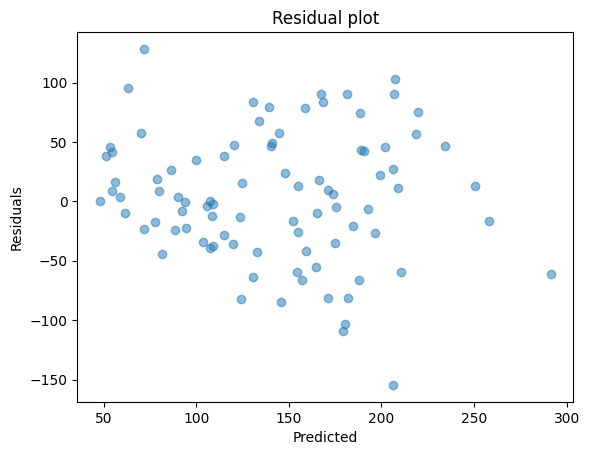

In [ ]:
# Residual plot
# if model is a good fit, residual plot should be a random scatter around zero (no trend)
# and no bunching up around zero

plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.title("Residual plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
